# BMW Sales Analysis (2010-2024)🚘

## Basic Data Preprocessing/Checking

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# macOS
# df = pd.read_csv('/Users/gohjunrong/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/BMW sales data (2010-2024) (1).csv')
#WindowsOS
df = pd.read_csv("C:/Users/user1/OneDrive - SIM - Singapore Institute of Management/BMW sales data (2010-2024) (1).csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [106]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


## EDA exploratory data analysis


### Total Sales Volume Trend
 

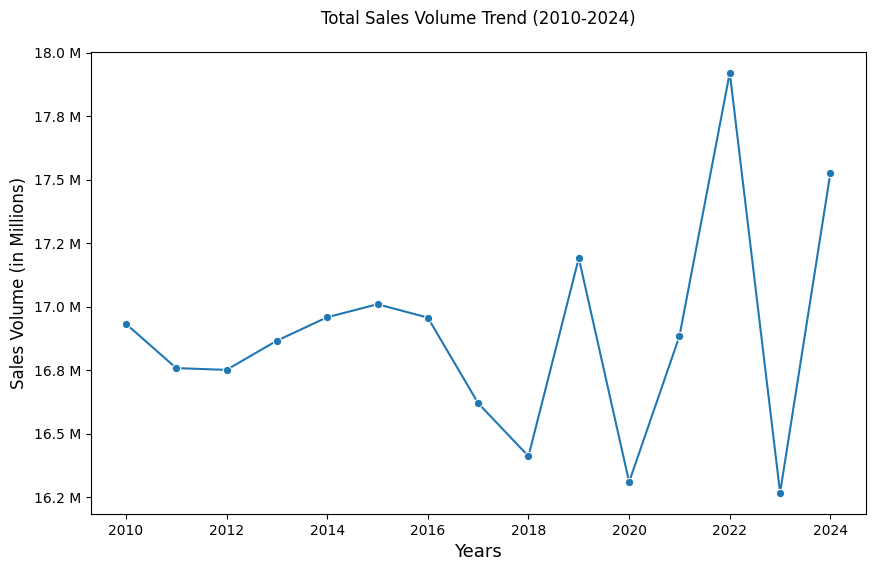

In [107]:
import seaborn as sns 
import matplotlib.ticker as ticker

#Change tick format from 1e6 to 'M' for easier stakeholder interpretation
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)


total_sales = df.groupby('Year')['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year',y='Sales_Volume',data=total_sales, marker='o')
plt.title("Total Sales Volume Trend (2010-2024)",pad=20)
plt.xlabel('Years',fontsize=13)
plt.ylabel('Sales Volume (in Millions)',fontsize=12)
plt.gca().yaxis.set_major_formatter(million_formatter)  
plt.show()

#### Key Insights
- Analysing the overall growth throughout the years 
- Identifying crucial years where sales were affected greatly eg 2020 due to COVID
- Allows for long-term planning to determine where company is headed

### Total Sales by Fuel type 


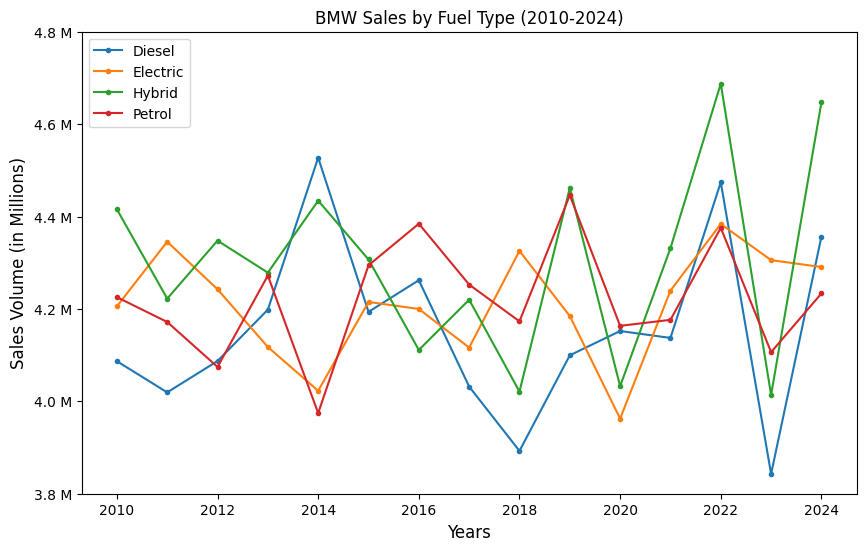

In [108]:
fueltypes = df.pivot_table(
    index='Year',
    columns='Fuel_Type',
    values='Sales_Volume',
    aggfunc='sum'
)
# print(fueltypes)

plt.figure(figsize=(10,6))
for fuel in fueltypes.columns:
        plt.plot(fueltypes.index, fueltypes[fuel], marker='.')
        
plt.legend(fueltypes)
plt.title("BMW Sales by Fuel Type (2010-2024)")
plt.xlabel('Years',fontsize=12)
plt.ylabel('Sales Volume (in Millions)',fontsize=12)
plt.gca().yaxis.set_major_formatter(million_formatter)  
plt.yticks(np.arange(3800000,5000000,200000))

plt.show()

#### Key Insights 
- Crucial aspect to take note of as it illustrates how consumers' sentiments have changed over the years
- Rise in hybrid/electric vehicles being sold could be due to government interventions such as environmental regulations and tax credits given to the purchase of electric vehicles 
- Do we shift focus more towards electric? 
- What happens if government regulations loosen or tax credits stop being handed out?

### Analysis of models sold across different regions


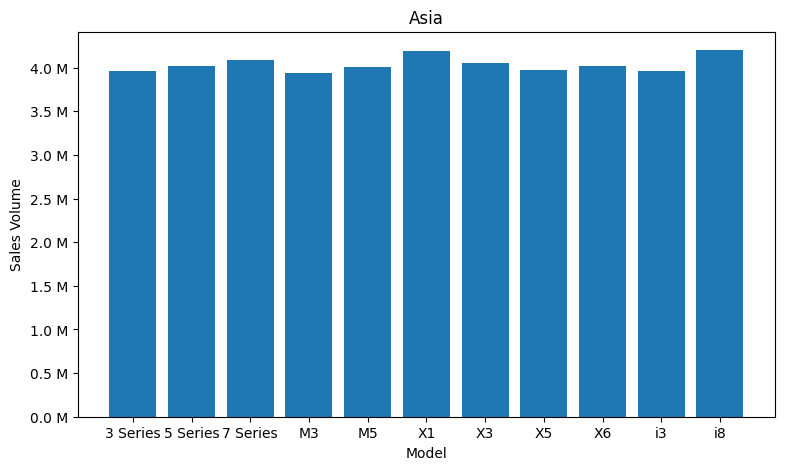

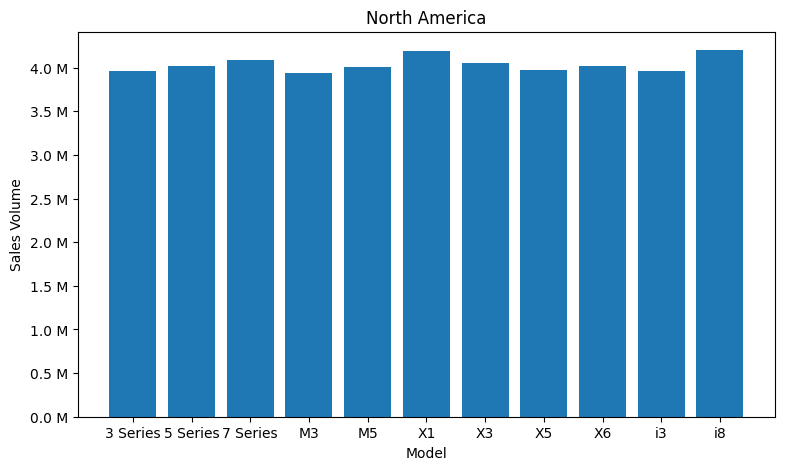

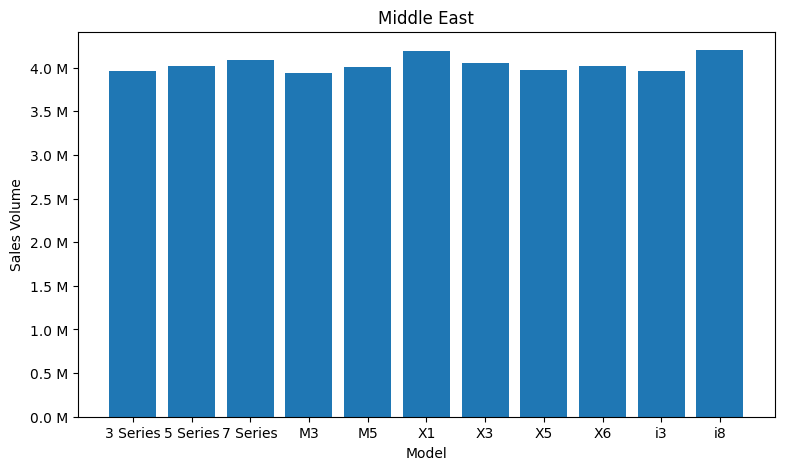

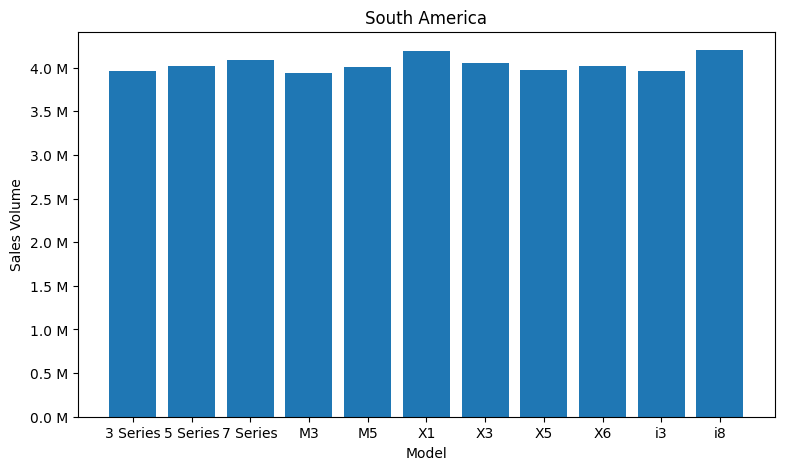

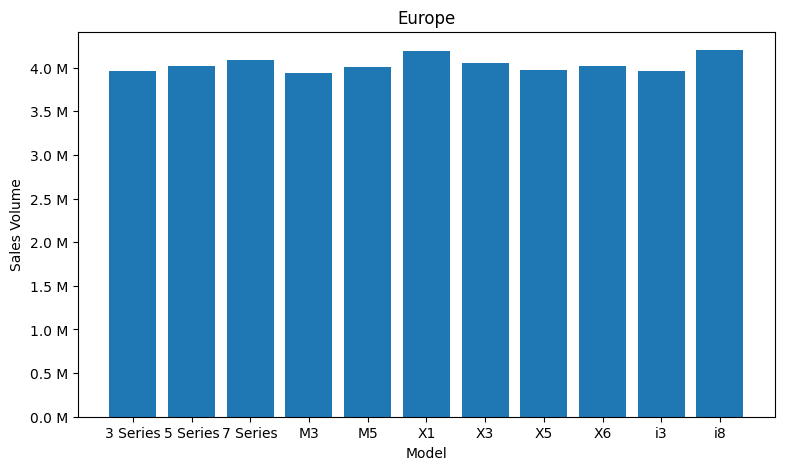

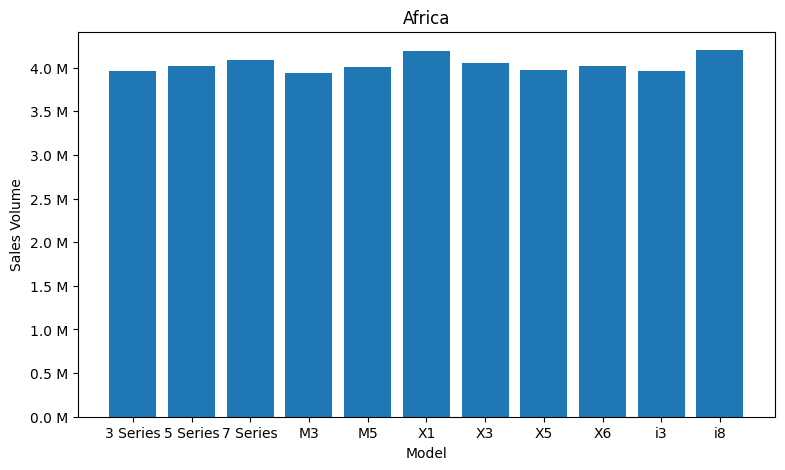

In [109]:
allmodels = df['Model'].unique()
allregions = df['Region'].unique()
# print(allmodels,'\n',allregions)

# Getting only relevant data
salesByRegion_df = df[['Model', 'Region', 'Sales_Volume']]
salesByRegion_df = salesByRegion_df.groupby(['Region', 'Model']).sum()

# Reset the index to bring 'Model' and 'Region' back as columns
salesByRegion_df = salesByRegion_df.reset_index()
# print(salesByRegion_df)

for region in allregions:
    plt.figure(figsize=(9,5))
    region_data = [salesByRegion_df['Region']== region]
    plt.bar(salesByRegion_df['Model'],salesByRegion_df['Sales_Volume'])
    plt.title(f'{region}')
    plt.xlabel('Model')
    plt.ylabel('Sales Volume')
    plt.gca().yaxis.set_major_formatter(million_formatter)  
    plt.show()


#### Key Insights
- Identifying the top-selling in each region 
- Provides information on consumers' preferences across different regions
- Option to focus even more on most popular model or aim to capture other market shares of different models

# Identifying the models that bring in the most revenue

<p>
y axis total sales sold

x axis price of model
</p>


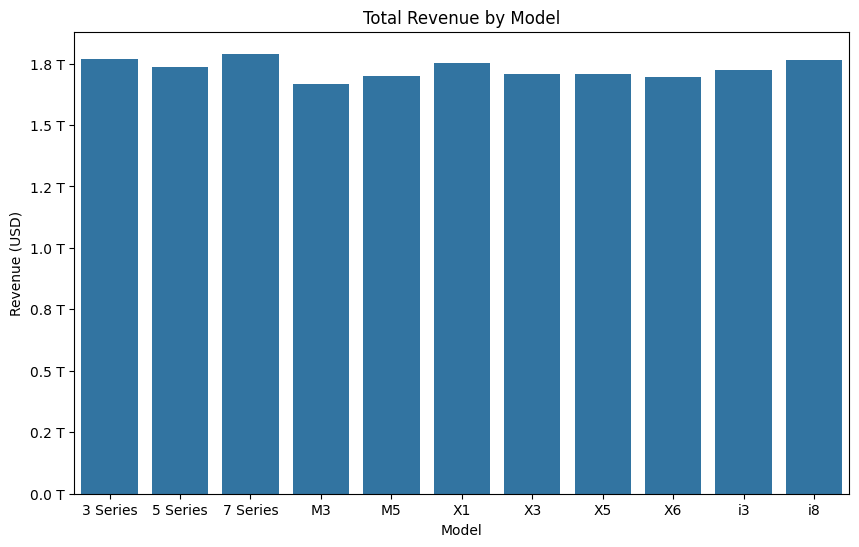

In [110]:
df['Revenue'] = df['Sales_Volume'] * df['Price_USD']
revenue_by_model = df.groupby(['Model'])['Revenue'].sum().reset_index()

@ticker.FuncFormatter
def trillion_formatter(x, pos):
    return "%.1f T" % (x/1E12)

plt.figure(figsize=(10, 6))  
sns.barplot(data=revenue_by_model, x='Model', y='Revenue')

plt.title('Total Revenue by Model')  
plt.xlabel('Model')  
plt.ylabel('Revenue (USD)')  
plt.gca().yaxis.set_major_formatter(trillion_formatter)  

plt.show()


#### Key Insights
- Continuing developing and maintaining standards for the model that generates the most revenue
- Understand what is the driver behind its popularity i.e. selling points 
- Getting a general view of how revenue generated is distributed across the models, a narrow distribution is unfavourable due to the high risk associated with it
    - Being a single point of failure
    - Sensitivity to market sentiments 
    - Narrow target audience 

## Linear Regresssion Model for Price Prediction

### Encoding Categorical Features

In [121]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Obtaining numerical and categorical columns respectively
numerical_columns = df[['Year','Engine_Size_L','Mileage_KM','Sales_Volume']]
# print(numerical_columns)
# cat_columns  = df.drop(numerical_columns,axis=1).drop('Price_USD',axis=1)
cat_columns = df[['Model','Region','Color','Fuel_Type','Transmission','Sales_Classification']]
print(cat_columns)

# Encoding features to be passed into mutual info function
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohe = ohe.fit_transform(cat_columns)

ohe

          Model         Region   Color Fuel_Type Transmission  \
0      5 Series           Asia     Red    Petrol       Manual   
1            i8  North America     Red    Hybrid    Automatic   
2      5 Series  North America    Blue    Petrol    Automatic   
3            X3    Middle East    Blue    Petrol    Automatic   
4      7 Series  South America   Black    Diesel       Manual   
...         ...            ...     ...       ...          ...   
49995        i3           Asia     Red    Hybrid       Manual   
49996        i3    Middle East  Silver  Electric       Manual   
49997  5 Series    Middle East     Red    Petrol    Automatic   
49998        i3           Asia   White  Electric    Automatic   
49999        X1  North America    Blue    Diesel       Manual   

      Sales_Classification  
0                     High  
1                      Low  
2                      Low  
3                      Low  
4                      Low  
...                    ...  
49995           

,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,...,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Sales_Classification_High,Sales_Classification_Low
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
49997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Utilising Mutual Information
- To determine possible features to be used

In [113]:
from sklearn.feature_selection import mutual_info_regression
X = pd.concat([numerical_columns,ohe],axis=1)
y = df['Price_USD']

mis = mutual_info_regression(X,y)
mis = pd.Series(mis)
mis.index = X.columns
mis.sort_values(ascending=False)


Mileage_KM                   0.004101
Year                         0.003921
Fuel_Type_Hybrid             0.002228
Region_Africa                0.002026
Region_South America         0.002021
Engine_Size_L                0.001972
Model_X3                     0.001676
Model_M5                     0.001084
Color_Red                    0.001021
Fuel_Type_Petrol             0.000995
Fuel_Type_Diesel             0.000945
Transmission_Manual          0.000898
Model_5 Series               0.000895
Transmission_Automatic       0.000876
Model_X1                     0.000864
Model_i3                     0.000714
Color_Silver                 0.000703
Model_X6                     0.000574
Model_3 Series               0.000265
Region_Middle East           0.000000
Region_Europe                0.000000
Region_Asia                  0.000000
Model_i8                     0.000000
Model_X5                     0.000000
Sales_Volume                 0.000000
Model_7 Series               0.000000
Model_M3    

Shows extremely little dependencies across all factors

### Train and Test Model

In [114]:
y = df['Price_USD']
X = pd.concat([numerical_columns,ohe],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, train_size=0.8)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
print(f'train score: {lr.score(X_train,y_train)}\n\
test score: {lr.score(X_test,y_test)}')

train score: 0.0008639180557794557
test score: -0.0012412742477825311


### Metrics to determine model performance

In [115]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(
    f'---Metrics Summary---\n'
    f'Mean Absolute Error: {mae}\n'
    f'Mean Square Error: {mse}\n'
    f'R-squared: {r2}\n'
)


---Metrics Summary---
Mean Absolute Error: 22573.45220598594
Mean Square Error: 677756346.2879537
R-squared: -0.0012412742477825311



### Analysis of Linear Regression Model
- Based off the metrics used i.e. MI,MSE,MAE,R<sup>2</sup> our model is not suitable for price prediction at all
- This is most likely due to inaccurate data provided

## Random Forest Classifier to determine Sales Classification


In [ ]:
# Sales Volume and Revenue not included as they are highly linked to Sales Classification
from sklearn.ensemble import RandomForestClassifier

numerical_columns = df[['Year','Engine_Size_L','Mileage_KM','Price_USD']]

cat_columns = df[['Model','Region','Color','Fuel_Type','Transmission']]
                                                                        
ohe = OneHotEncoder( sparse_output=False).set_output(transform='pandas')
ohe = ohe.fit_transform(cat_columns)
ohe

,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,...,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X = pd.concat([numerical_columns,ohe],axis=1)
y = df['Sales_Classification'].to_frame()

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, train_size=0.8)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


d:\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [124]:
y_pred = rfc.predict(X_test)
rfc.score(X_test,y_test)

0.6862

In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.33      0.03      0.06      3032
         Low       0.70      0.97      0.81      6968

    accuracy                           0.69     10000
   macro avg       0.51      0.50      0.44     10000
weighted avg       0.58      0.69      0.58     10000



### Analysis of Random Forest Classifier
- Overall achieved performance of around 69% accuracy
- Good performance when it comes to predicting Sales Classification for 'Low' group 
- However, when it comes to classifying the 'High' group, model does not perform well due to lack of representation in dataset
- Possible solution: Conduct oversampling to improve representatio of the 'High' group
